# **Stage 2**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E Commerce Dataset.xlsx to E Commerce Dataset (1).xlsx


In [ ]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

## 1. Data Cleansing

### A. Handle Missing Values


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df.OrderAmountHikeFromlastYear.mean(), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [ ]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### B. Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

### C. Handle Outlier

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Tenure', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [ ]:
df[nums].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.134103,15.566785,2.934636,3.688988,3.066785,4.214032,15.707922,1.716874,2.961812,4.459325,177.223030
std,8.357951,8.345961,0.705528,1.023999,1.380194,2.583586,3.587926,1.857640,2.879248,3.570626,49.207036
min,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,2.000000,3.000000,2.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,15.000000,20.000000,3.000000,4.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
from scipy import stats

In [ ]:
# Handling with zscore
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Tenure', 'WarehouseToHome','CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5619


In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000
mean,52816.221392,0.168713,10.125467,1.653853,15.563623,2.934508,3.688201,3.065848,4.216409,0.285282,15.703257,1.712582,2.953728,4.454351,177.434362
std,1625.642617,0.374532,8.350080,0.915021,8.342056,0.705456,1.023898,1.380046,2.584108,0.451589,3.587036,1.849385,2.867241,3.565614,48.729207
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,37.000000
25%,51410.500000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.830000
50%,52815.000000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.340000
75%,54224.500000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.730000


In [ ]:
df['PreferredLoginDevice'].replace('Phone','Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)
df['PreferredPaymentMode'].replace('Cash on Delivery','COD', inplace=True)
df['PreferedOrderCat'].replace('Mobile','Mobile Phone', inplace=True)

In [ ]:
print ("Number of Every Distinct Categorical Feature After Standardization\n")

for col_name in df.columns:
    if df[col_name].dtypes =='object':
        print ('\nNumber of unique category in {} : {}'.format(col_name, df[col_name].nunique()))
        print ('The values are :')
        print (df[col_name].value_counts())

Number of Every Distinct Categorical Feature After Standardization


Number of unique category in PreferredLoginDevice : 2
The values are :
Mobile Phone    3989
Computer        1630
Name: PreferredLoginDevice, dtype: int64

Number of unique category in PreferredPaymentMode : 5
The values are :
Debit Card     2312
Credit Card    1767
E wallet        612
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64

Number of unique category in Gender : 2
The values are :
Male      3376
Female    2243
Name: Gender, dtype: int64

Number of unique category in PreferedOrderCat : 5
The values are :
Mobile Phone          2078
Laptop & Accessory    2045
Fashion                826
Grocery                408
Others                 262
Name: PreferedOrderCat, dtype: int64

Number of unique category in MaritalStatus : 3
The values are :
Married     2976
Single      1796
Divorced     847
Name: MaritalStatus, dtype: int64


### D. Feature Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df[i])
  kts = kurtosis(df[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature = df.columns.tolist()
del feature[:2]
feature

['Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

### E. Feature Encoding

In [ ]:
for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    3989
Computer        1630
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card     2312
Credit Card    1767
E wallet        612
COD             514
UPI             414
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3376
Female    2243
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2078
Laptop & Accessory    2045
Fashion                826
Grocery                408
Others                 262
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2976
Single      1796
Divorced     847
Name: MaritalStatus, dtype: int64
------------------------------ 



In [ ]:
mapping_login_device= {
    'Mobile Phone' : 0,
    'Computer' : 1
}

mapping_gender = {
    'Male' : 0,
    'Female' : 1
}

mapping_marital_status = {
    'Married' : 0,
    'Single' : 1,
    'Divorced' : 2
}
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map(mapping_login_device)
df['Gender'] = df['Gender'].map(mapping_gender)
df['MaritalStatus'] = df['MaritalStatus'].map(mapping_marital_status)

In [ ]:
for cat in ['PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df_new = df.drop(columns=['PreferredPaymentMode','PreferedOrderCat']).copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5619 non-null   int64  
 1   Churn                                5619 non-null   int64  
 2   Tenure                               5619 non-null   float64
 3   PreferredLoginDevice                 5619 non-null   int64  
 4   CityTier                             5619 non-null   int64  
 5   WarehouseToHome                      5619 non-null   float64
 6   Gender                               5619 non-null   int64  
 7   HourSpendOnApp                       5619 non-null   float64
 8   NumberOfDeviceRegistered             5619 non-null   int64  
 9   SatisfactionScore                    5619 non-null   int64  
 10  MaritalStatus                        5619 non-null   int64  
 11  NumberOfAddress               

### F. Handle Class Imbalance

In [ ]:
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical
df_new['Churn_Class'] = df_new['Churn']>0.9
print(df_new['Churn_Class'].value_counts())

False    4671
True      948
Name: Churn_Class, dtype: int64


In [ ]:
#Pemisahan feature dan target
x = df_new[[col for col in df_new.columns if col not in ['Churn_Class','Churn']]].values
y = df_new['Churn_Class'].values
print(x.shape)
print(y.shape)

(5619, 27)
(5619,)


In [ ]:
#Proses undersampling dan oversampling
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(1.0).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(1.0).fit_resample(x, y)
x_smote, y_smote = over_sampling.SMOTE().fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=1.0 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [ ]:
print(pd.Series(y).value_counts())

False    4671
True      948
dtype: int64


In [ ]:
print(pd.Series(y_over).value_counts())

True     4671
False    4671
dtype: int64


In [ ]:
print(pd.Series(y_under).value_counts())

False    948
True     948
dtype: int64


In [ ]:
print(pd.Series(y_smote).value_counts())

True     4671
False    4671
dtype: int64


## 2. Feature Engineering

## A. Feature Selection
Feature selection tidak dapat dilakukan karena semua feature digunakan untuk modelling

## B. Feature Extraction


Menambahkan feature average churn

In [ ]:
df['avg_cashback_per_order'] = df['CashbackAmount'] / df['OrderCount']

In [ ]:
churn_percentage = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'][df['Churn']==0].count()),2)

In [ ]:
print ('rata-rata churn adalah', churn_percentage, '%')

rata-rata churn adalah 20.3 %


## C. Feature Tambahan
1. Age = untuk mengetahui persebaran umur yang lebih banyak churn.
2. Product recommendation = untuk dapat mengukur kategori mana yang dapat ditawari promo.
3. Product review = menggali ulasan customer sehingga dapat membantu keputusan pembelian bagi customer berikutnya.
4. Call-to-action = memberikan informasi baru tentang produk-produk atau promo sehingga dapat menarik perhatian customer.

# **Stage 3**

## Split Data

In [ ]:
# Split Feature and Label
x = df_new[[col for col in df_new.columns if col not in ['Churn_Class','Churn', 'CustomerID']]].values
y = df_new['Churn_Class'].values

In [ ]:
# split data train dan test
x = df_new[[col for col in df_new.columns if col not in ['Churn_Class','Churn', 'CustomerID']]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
from imblearn import over_sampling
x_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in transform:
  scaler = StandardScaler().fit(x_train[[i]])
  x_train[i] = scaler.transform(x_train[[i]])
  x_test[i] = scaler.transform(x_test[[i]])

x_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,...,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
271,16.0,0,1,14.0,1,0.083773,-0.692300,-0.040349,0,0.312109,...,0,0,0,0,1,0,0,1,0,0
3567,20.0,0,1,9.0,0,0.083773,0.294227,-0.768303,0,-0.079571,...,1,0,0,0,0,0,0,1,0,0
4597,4.0,0,3,14.0,0,0.083773,0.294227,0.687605,1,-0.862930,...,0,0,0,1,0,0,0,0,1,0
5109,13.0,0,1,25.0,0,0.083773,0.294227,-0.040349,1,-0.862930,...,0,0,1,0,0,0,0,1,0,0
2450,6.0,0,3,14.0,0,-1.348751,-0.692300,1.415559,0,-0.471251,...,0,0,1,0,0,0,0,1,0,0


## Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, x, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.78
Recall (Test Set): 0.87
F1-Score (Test Set): 0.82
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9649479771485725


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.69
Recall (Test Set): 0.54
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

roc_auc (crossval train): 0.8811941367341417
roc_auc (crossval test): 0.8798283803000689


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

## ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(x_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.71
Recall (Test Set): 0.66
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.929020862782937
roc_auc (crossval test): 0.9184039229544763


## XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=42)
xg.fit(x_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.77
Recall (Test Set): 0.66
F1-Score (Test Set): 0.71
roc_auc (test-proba): 0.94
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9584331274266065
roc_auc (crossval test): 0.9470698277614831


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
eval_classification(rf)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.93
Recall (Test Set): 0.84
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991232413149863


Dengan melihat hasil evaluation pada masing-masing model, kami memutuskan menggunakan model Random Forest yang memiliki gap roc_auc yang rendah dan precision yang tinggi 

In [ ]:
# Random Forest Modeling setelah Oversampling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_smote, y_train_smote)

y_pred_over = rf.predict(x_test)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.91
Recall (Test Set): 0.85
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.99
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991232413149863


## K-Fold Cross Validation

In [ ]:
# cek train dan validation masing-masing iterasi
from sklearn.model_selection import KFold

import pandas as pd

dataset = df_new
x = df_new[[col for col in df_new.columns if col not in ['Churn_Class','Churn', 'CustomerID']]]
y = df_new['Churn_Class']
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validatorprint(kf)

5

In [ ]:
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   8   12   15 ... 5595 5604 5612]
TRAIN: [   0    1    2 ... 5615 5616 5617] TEST: [  14   19   24 ... 5613 5614 5618]
TRAIN: [   1    2    3 ... 5614 5615 5618] TEST: [   0    6    7 ... 5599 5616 5617]
TRAIN: [   0    3    4 ... 5616 5617 5618] TEST: [   1    2   10 ... 5610 5611 5615]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   3    4    5 ... 5600 5606 5608]


## Cross Validation in Validation Set Only

In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, x, y, cv=kf, scoring='roc_auc')
result.mean()

0.9902811418924327

## Cross Validation in Train Set & Validation Set


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, x, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (test): 0.9907559233968597


Setelah dilakukan k-fold cross validation, model sudah best-fit terlihat dengan score roc_auc yang memiliki selisih cukup kecil

## Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(x_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.83
Recall (Test Set): 0.79
F1-Score (Test Set): 0.81
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.997680206471651
roc_auc (crossval test): 0.9864311680454506


## Learning Curve

param value: 10; train: 0.9941481045557017; test: 0.9485732504383867
param value: 10; train: 0.9945831770501531; test: 0.9434985918486637
param value: 11; train: 0.9934326630533216; test: 0.9422711089855996
param value: 11; train: 0.9932465076877125; test: 0.9435304745204316
param value: 12; train: 0.9921731679404677; test: 0.9408204474201605
param value: 13; train: 0.9910755470585784; test: 0.9409267229927201
param value: 13; train: 0.9908433143351204; test: 0.9372867846325521
param value: 14; train: 0.988905438399081; test: 0.9389074871140868
param value: 14; train: 0.9902247843789095; test: 0.9363196769222594
param value: 15; train: 0.9884494926485314; test: 0.9328125830277911
param value: 16; train: 0.9872264192376448; test: 0.9351293905095913
param value: 16; train: 0.9874008600207497; test: 0.9341888516924386
param value: 17; train: 0.9855857387098581; test: 0.9281258302779105
param value: 17; train: 0.9864446660985449; test: 0.9293958233699985
param value: 18; train: 0.985403346

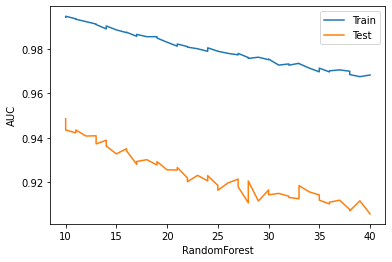

In [ ]:
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
    model.fit(x_train_smote, y_train_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(x_train_smote)
    train_auc = roc_auc_score(y_train_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(x_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

## Feature Importance

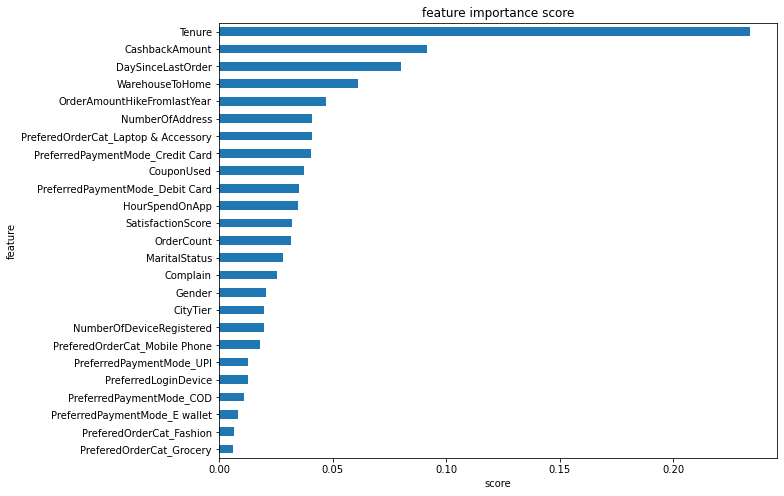

In [ ]:
show_feature_importance(rf)

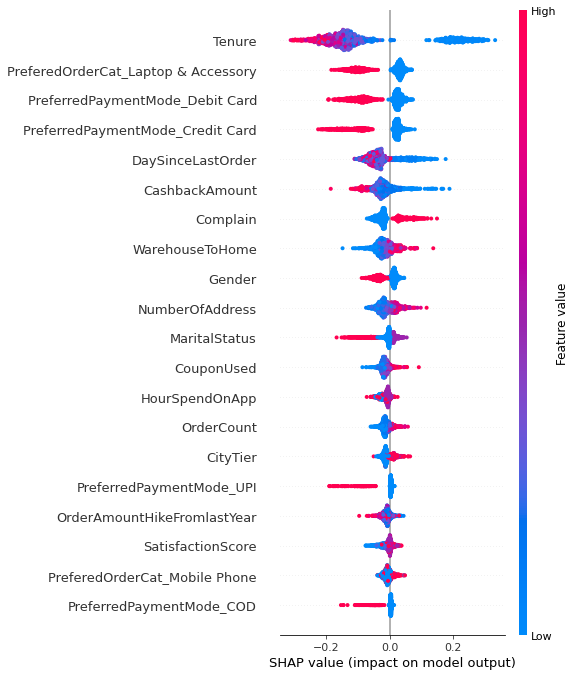

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)

Evaluasi Feature Importance & Business Insight:

* Berdasarkan feature importance yang telah dilakukan, feature tenure merupakan  feature paling berpengaruh untuk mengidentifikasi kecenderungan customer churn. Dari grafik dapat dilihat semakin kecil tenure, semakin besar customer akan melakukan churn.
* Pada feature preferred payment mode debit card, semakin banyak pemesanan dengan pembayaran debit card dan credit card, semakin besar customer akan melakukan churn.  
* Pada feature DaySinceLastOrder semakin singkat interval pemesanan, semakin besar customer melakukan churn. 
* Pada feature preferred order cat pada laptop dan accessory, semakin tinggi order, semakin besar customer melakukan churn.
* Potensi churn yang sangat besar berada di kategori electronic didominasi oleh male.






Rekomendasi Businesss:
* Rebranding dengan memberikan jaminan produk asli dan garansi untuk produk electronic
*   Untuk customer dengan tenure 0-2 bulan dapat diberikan package promo cashback untuk mencegah potensi churn terhadap customer baru.
*   Dapat bekerja sama dengan layanan digital wallet lainnya agar customer dapat melakukan transaksi selain menggunakan debit/kredit.
* Memberikan rekomendasi produk sesuai kategori yang terpopuler berdasarkan minat customer sebelumnya, sehingga dapat menarik minat customer untuk melakukan pembelian.
*   Memberi pesan notifikasi bagi customer yang sudah pernah memesan, untuk ditarik kembali memesan produk-produk lainnya.





